In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

In [2]:
df = pd.read_csv("driving_log.csv", names=['center', 'left', 'right', 'steering_angle', 'throttle', 'break', 'speed'])
df.head()

,center,left,right,steering_angle,throttle,break,speed
0,/home/witek/DataWorkshop/3rd_Edition/IMG/cente...,/home/witek/DataWorkshop/3rd_Edition/IMG/left_...,/home/witek/DataWorkshop/3rd_Edition/IMG/right...,0.0,1,0,9.939126
1,/home/witek/DataWorkshop/3rd_Edition/IMG/cente...,/home/witek/DataWorkshop/3rd_Edition/IMG/left_...,/home/witek/DataWorkshop/3rd_Edition/IMG/right...,0.0,1,0,10.824830
2,/home/witek/DataWorkshop/3rd_Edition/IMG/cente...,/home/witek/DataWorkshop/3rd_Edition/IMG/left_...,/home/witek/DataWorkshop/3rd_Edition/IMG/right...,0.0,1,0,11.538070
3,/home/witek/DataWorkshop/3rd_Edition/IMG/cente...,/home/witek/DataWorkshop/3rd_Edition/IMG/left_...,/home/witek/DataWorkshop/3rd_Edition/IMG/right...,0.0,1,0,12.400110
4,/home/witek/DataWorkshop/3rd_Edition/IMG/cente...,/home/witek/DataWorkshop/3rd_Edition/IMG/left_...,/home/witek/DataWorkshop/3rd_Edition/IMG/right...,0.0,1,0,13.033970


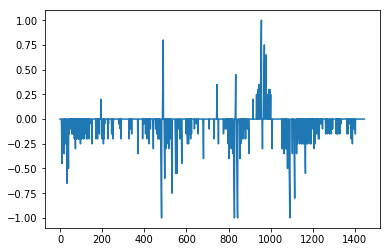

In [7]:
df['steering_angle'].plot()

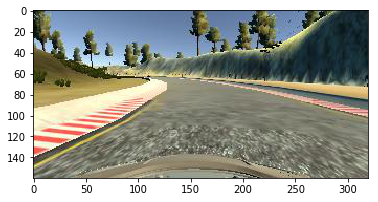

In [17]:
img = Image.open(df['center'][0])
plt.imshow(img)

In [21]:
img = np.asarray(img)
img.shape

(160, 320, 3)

In [22]:
def loadImage(fname):
    return np.asarray(Image.open(fname))
def process_image(img):
    return img[10:130:2, ::4, :]


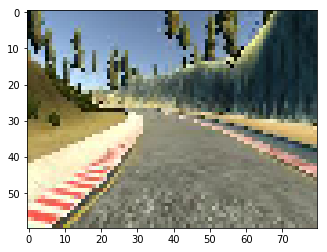

In [24]:
img = process_image(loadImage(df['center'][0]))
plt.imshow(img)

In [32]:
x = [process_image(loadImage(fname)) for fname in df['center']]
x += [process_image(loadImage(fname)) for fname in df['left']]
x += [process_image(loadImage(fname)) for fname in df['right']]
y = np.array(df['steering_angle'])
y = np.concatenate([y, y+0.4, y-0.4])

In [34]:
X = np.array(x)
print(X.shape)
print(y.shape)

(4338, 60, 80, 3)
(4338,)


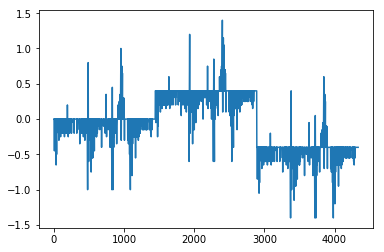

In [35]:
plt.plot(y)
plt.show()

In [37]:
np.save('X.npy', X)
np.save('y.npy', y)